### Sierra Lear
### BMI 203, Winter 2020

# Homework 1

## Generating 100 random vectors of different sizes

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

The cell below is a helper function to help me find the necessary time complexity for my bubble and insertion sorting algorithms.

In [2]:
vector_size = np.array([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000])

def t_complexity(sorting_algorithm):
    '''
    This function calculates the average number of assignments and conditionals
    for a given sorting algorithm of 100 random vectors whose size is specified by the array "vector_size"
    
    Inputs: sorting_algorithm -- which of three algorithms (either bubblesort, insertion sort, or quick sort) to use
    Outputs: mean_assignments -- np.array of average number of assignments for 100 vectors of sizes specified in "vector_size"
             mean_conditionals -- np.array of average number of conditionals for 100 vectors of sizes specified in "vector size"
    '''
    np.random.seed(1) #set seed of random number generator to 1, for reproducibility
    mean_assignments = np.zeros(10)
    mean_conditionals = np.zeros(10)
    for count, size in enumerate(vector_size): #loop specifying position and size of 100 vectors
        assignments = np.zeros(100) #creating array to store future assignment numbers
        conditionals = np.zeros(100) #creating array to store future conditional numbers 
        for v_num in range(100): #loop which creates vectors of calculated assignments and conditionals for 100 vectors of a given size
            vector = np.random.rand(size) #generating random vector of given size
            sorted_array, assignment, conditional = sorting_algorithm(vector) #sorting vector based on sorting algorithm
            assignments[v_num] = assignment #storing assignment number in assignments vector
            conditionals[v_num] = conditional #storing conditional number in conditionals vector
        mean_assignments[count] = assignments.mean() #stores average number of assignments in mean_assignments
        mean_conditionals[count] = conditionals.mean() #stores average number of conditionals in mean_conditionals
        print("Finished calculations for vectors of size:",size)
                
    return mean_assignments, mean_conditionals
    

## Bubblesort

In [3]:
#Bubblesort implementation function
def bubblesort(array):
    '''
    This function sorts any given list of numbers from smallest to largest using the "bubble sort" algorithm.
    
    Inputs: array (array of numbers to be sorted)
    Outputs: sorted array, number of assignments, number of conditionals
    '''
    conditional = 0
    assignment = 0
    n = len(array) #total number of elements in array
    
    for i in range(n): #first loop: passes through whole list
        for j in range(n-i-1): #second loop: only compares elements in list that have "bubbled" to the top already/you know are correct
            conditional = conditional + 1 #counts conditionals (i.e. whenever comparison between two numbers are made)
            if array[j] > array[j+1]: ##if the first element in the pair is bigger than the second element in the pair...
                ##swap them!
                array[j], array[j+1] = array[j+1], array[j] #switches the position of the first and second element in the pair
                assignment = assignment + 1 #counts assignments
            
    return array, assignment, conditional

In [4]:
#testing to make sure algorithm works
sorted_array, assignment, conditional = bubblesort(np.array([3,2,1,5,7,8]))
print(sorted_array)
print("The number of assignments are:",assignment)
print("The number of conditionals are: ",conditional)

[1 2 3 5 7 8]
The number of assignments are: 3
The number of conditionals are:  15


In [5]:
bubble_assignments, bubble_conditionals = t_complexity(bubblesort) #returning average assignment and conditional number
#for bubble sort on different size vectors

Finished calculations for vectors of size: 100
Finished calculations for vectors of size: 200
Finished calculations for vectors of size: 300
Finished calculations for vectors of size: 400
Finished calculations for vectors of size: 500
Finished calculations for vectors of size: 600
Finished calculations for vectors of size: 700
Finished calculations for vectors of size: 800
Finished calculations for vectors of size: 900
Finished calculations for vectors of size: 1000


In [6]:
print(bubble_assignments) #average number of assignments, corresponding to vectors of size "vector_size"
print(bubble_conditionals) #average number of conditionals, corresponding to vectors of size "vector_size"

[  2441.74   9998.93  22559.13  39840.04  62384.23  90064.67 122218.12
 160135.55 202305.77 249414.12]
[  4950.  19900.  44850.  79800. 124750. 179700. 244650. 319600. 404550.
 499500.]


## Insertion Sort

In [7]:
#insertion sort implementation function
def insertionsort(array):
    '''
    This function sorts any given array of numbers from smallest to largest using the "insertion sort" algorithm.
    
    Inputs: array (array of numbers to be sorted)
    Outputs: sorted array, number of assignments, number of conditionals
    '''
    conditional = 0 
    assignment = 0
    n = len(array) #total number of elements in array
    

            
    for i in range(1, n): #go through whole array
        temp = array[i] #assign current place in array as temporary variable
        j = i-1 #assign index you will compare temporary variable to as one element to the left
        while True: #continue to compare and swap until "if" conditions aren't met
            if j >= 0: #checking if you hit the first element in the array
                conditional = conditional + 1 #count conditional
            else:
                break
            if array[j] > temp: #checking if the comparison element is larger than temporary variable. If so, then:
                array[j], array[j+1] = array[j+1], array[j] #swap
                j = j-1 #increment the comparison element to be one lower
                conditional = conditional + 1 #count conditional
                assignment = assignment + 1 #count assignment
            else:
                break
        array[j+1] = temp #assign element as new temporary variable
        
        
            
    return array, assignment, conditional
            

In [8]:
#testing that insertion sort algorithm function works
insertion_sorted_array, insertion_assignment, insertion_conditional = insertionsort([4,1,2,3])
print(insertion_sorted_array)
print("The number of assignments are:",insertion_assignment)
print("The number of conditionals are: ",insertion_conditional)

[1, 2, 3, 4]
The number of assignments are: 3
The number of conditionals are:  8


In [18]:
insertion_assignments, insertion_conditionals = t_complexity(insertionsort) #returning average assignment and conditional number
#for insertion sort on different size vectors

Finished calculations for vectors of size: 100
Finished calculations for vectors of size: 200
Finished calculations for vectors of size: 300
Finished calculations for vectors of size: 400
Finished calculations for vectors of size: 500
Finished calculations for vectors of size: 600
Finished calculations for vectors of size: 700
Finished calculations for vectors of size: 800
Finished calculations for vectors of size: 900
Finished calculations for vectors of size: 1000


In [19]:
print(insertion_assignments)
print(insertion_conditionals)

[  2441.74   9998.93  22559.13  39840.04  62384.23  90064.67 122218.12
 160135.55 202305.77 249414.12]
[  4978.45  20191.98  45412.01  80073.47 125261.51 180722.34 245129.06
 321064.07 405503.89 499821.07]


## Quick sort

To implement quick sort, I based my own code on the psuedo-code seen here: https://www.geeksforgeeks.org/quick-sort/

In [69]:
def partition(array, start, end):
    '''
    This function partitions an array of numbers from smallest to largest by picking a pivot element and ensuring
    that all smaller elements are below pivot and higher elements are above pivot.
    
    Inputs: array -- array of numbers to be partitioned
            start -- starting index of array (smaller pointer)
            end -- ending index of array
    Outputs: i + 1 -- incremented index of smaller pointer
    '''
    #because my quicksort() function is recursive, I am using global variables to initialize
    #my conditional and assignment variable outside the function
    global conditional
    global assignment

    i = (start - 1)  #index of smaller pointer
    pivot = array[end]  #pivot
  
    for j in range(start , end): #j represents the "larger pointer"
        conditional = conditional + 1 #count conditional
        if   array[j] < pivot: #if larger pointer is smaller than pivot:
            i = i + 1 #increase index of smaller point and...
            array[i], array[j] = array[j], array[i] #swap elements!
            assignment = assignment + 1 #count assignment
            
    array[i+1], array[end] = array[end], array[i+1] #swap pivot and increment small pointer
    assignment = assignment + 1 #count assignment
    return (i+1)             


def quicksort(array, start, end):
    '''
    This function sorts any given array of numbers from smallest to largest using the "quick sort" algorithm,
    which is the recusrive implementation of the partition() function.
    
    Inputs: array -- array of numbers to be partitioned
            start -- starting index of array (smaller pointer)
            end -- ending index of array
            
    Outputs: sorted array, number of assignments, number of conditionals
    '''
    
    if start < end:
        p = partition(array, start, end) #defining p as the index which we are partitioning at
        
        #next two lines sort elements preceding and following the partition p
        quicksort(array, start, p - 1) 
        quicksort(array, p + 1, end)
    
    return array, assignment, conditional

        

In [85]:
#note: I have to initialize assignment and conditional here because my function is recursive
assignment = 0 
conditional = 0

#testing to see if my quick sort function works
test_array = np.array([5,6,2,0,5,8,9])
n = len(test_array)

quick_sorted_array, assignment, conditional = quicksort(test_array, 0, n-1)
print(quick_sorted_array)
print("The number of assignments are:",assignment)
print("The number of conditionals are: ",conditional)

[0 2 5 5 6 8 9]
The number of assignments are: 18
The number of conditionals are:  17


In [70]:
#need a new t_complexity function that can deal with quick sort algorithm,
#since it requires global variables and additional inputs start and end
vector_size = np.array([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000])

def t_complexity_quick(sorting_algorithm):
    '''
    This function calculates the average number of assignments and conditionals
    for a given sorting algorithm of 100 random vectors whose size is specified by the array "vector_size"
    
    Inputs: sorting_algorithm -- which of three algorithms (either bubblesort, insertion sort, or quick sort) to use
    Outputs: mean_assignments -- np.array of average number of assignments for 100 vectors of sizes specified in "vector_size"
             mean_conditionals -- np.array of average number of conditionals for 100 vectors of sizes specified in "vector size"
    '''
    #next two lines allow conditional and assignment to be global variables since they're global in the quicksort function
    global conditional
    global assignment 
    np.random.seed(1) #set seed of random number generator to 1, for reproducibility
    mean_assignments = np.zeros(10)
    mean_conditionals = np.zeros(10)
    for count, size in enumerate(vector_size): #loop specifying position and size of 100 vectors
        assignments = np.zeros(100) #creating array to store future assignment numbers
        conditionals = np.zeros(100) #creating array to store future conditional numbers
        for v_num in range(100): #loop which creates vectors of calculated assignments and conditionals for 100 vectors of a given size
            #next two lines initialize/"reblank" my assignment and conditional variables for each vector
            assignment = 0
            conditional = 0
            vector = np.random.rand(size) #generating random vector of given size
            n = len(vector)
            sorted_array = sorting_algorithm(vector, 0, n-1) #sorting vector based on sorting algorithm
            assignments[v_num] = assignment #storing assignment number in assignments vector
            conditionals[v_num] = conditional #storing conditional number in conditionals vector
        mean_assignments[count] = assignments.mean() #stores average number of assignments in mean_assignments
        mean_conditionals[count] = conditionals.mean() #stores average number of conditionals in mean_conditionals
        print("Finished calculations for vectors of size:",size)
                
    return mean_assignments, mean_conditionals

In [71]:
quick_assignments, quick_conditionals = t_complexity_quick(quicksort) #returning average assignment and conditional number
#for quick sort on different size vectors

Finished calculations for vectors of size: 100
Finished calculations for vectors of size: 200
Finished calculations for vectors of size: 300
Finished calculations for vectors of size: 400
Finished calculations for vectors of size: 500
Finished calculations for vectors of size: 600
Finished calculations for vectors of size: 700
Finished calculations for vectors of size: 800
Finished calculations for vectors of size: 900
Finished calculations for vectors of size: 1000


In [72]:
print(quick_assignments)
print(quick_conditionals)

[ 400.46  920.86 1497.84 2124.24 2799.15 3378.05 4068.51 4805.29 5377.75
 6156.67]
[  648.54  1572.88  2571.62  3708.95  4837.79  5991.6   7155.74  8419.41
  9723.95 10949.37]


## Graphs of stuffs

Here, I am now plotting the time complexity results of all my algorithms as a summary and to prove the O() values of bubble and quick sort.

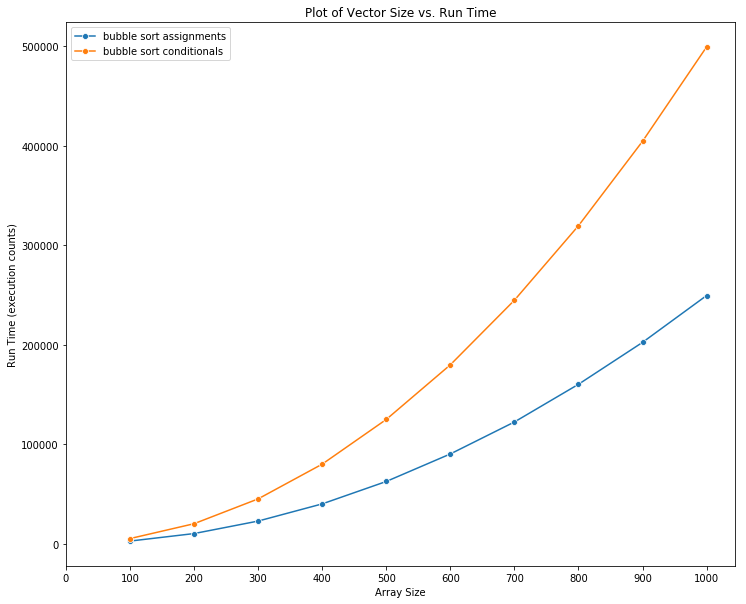

In [32]:
#plot of bubblesort assignments and conditionals with varying array length
f, ax = plt.subplots(figsize = [12, 10])
sns.lineplot(x=vector_size, y = bubble_assignments, label ="bubble sort assignments", markers = True, marker ="o")
sns.lineplot(x=vector_size, y = bubble_conditionals, label ="bubble sort conditionals", markers = True, marker ="o")
ax.set(xlabel = 'Array Size', ylabel = 'Run Time (execution counts)', title = 'Plot of Vector Size vs. Run Time',
      xticks = np.arange(0, 1100,100));

In [49]:
for index in range(len(vector_size)):
    print("For a",vector_size[index],"sized-array, the average number of assignments is", bubble_assignments[index], "and conditionals is", bubble_conditionals[index], "for bubble sort")


For a 100 sized-array, the average number of assignments is 2441.74 and conditionals is 4950.0 for bubble sort
For a 200 sized-array, the average number of assignments is 9998.93 and conditionals is 19900.0 for bubble sort
For a 300 sized-array, the average number of assignments is 22559.13 and conditionals is 44850.0 for bubble sort
For a 400 sized-array, the average number of assignments is 39840.04 and conditionals is 79800.0 for bubble sort
For a 500 sized-array, the average number of assignments is 62384.23 and conditionals is 124750.0 for bubble sort
For a 600 sized-array, the average number of assignments is 90064.67 and conditionals is 179700.0 for bubble sort
For a 700 sized-array, the average number of assignments is 122218.12 and conditionals is 244650.0 for bubble sort
For a 800 sized-array, the average number of assignments is 160135.55 and conditionals is 319600.0 for bubble sort
For a 900 sized-array, the average number of assignments is 202305.77 and conditionals is 404

The graph and numbers here suggest that bubble sort has a O(n^2), as the number of conditionals/assignments appear to be increasing quadratically with array size. This can also be checked by seeing if the ratio (number of assignments/N^2)--where N is the size of the array--is constant. Indeed, we show that is is (with a value of ~0.25) below:

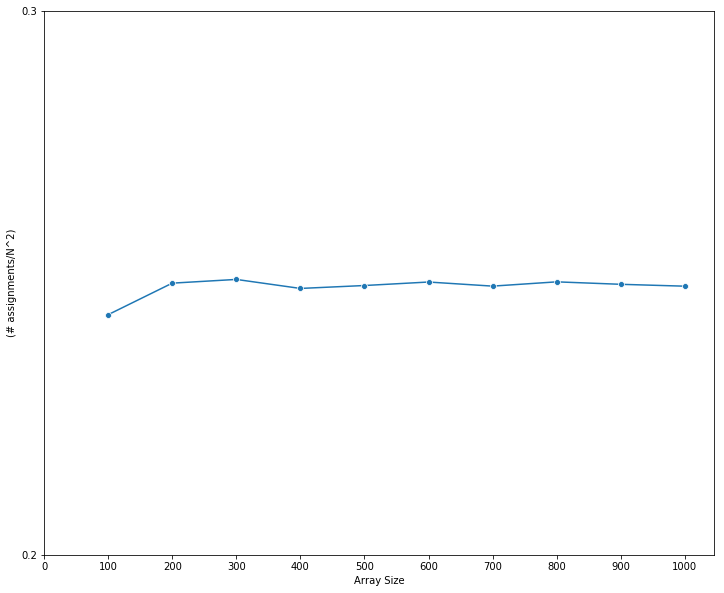

In [61]:
ratio = bubble_assignments/(vector_size**2)
f, ax = plt.subplots(figsize = [12, 10])
sns.lineplot(x=vector_size, y = ratio, markers = True, marker ="o")
ax.set(xlabel = 'Array Size', ylabel = '(# assignments/N^2)',
      xticks = np.arange(0, 1100,100),
      yticks = np.arange(0.2, 0.4, 0.1));

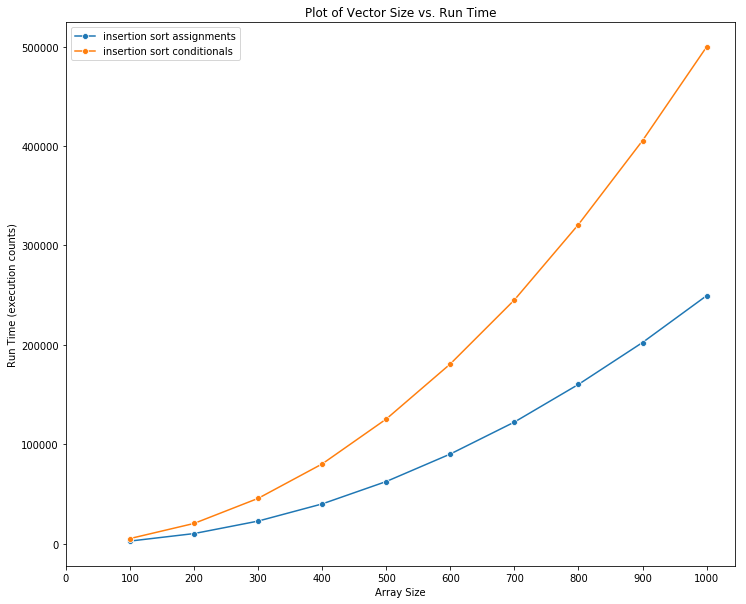

In [46]:
#plot of insertion sort assignments and conditions with varying array length
f, ax = plt.subplots(figsize = [12, 10])
sns.lineplot(x=vector_size, y = insertion_assignments, label="insertion sort assignments", markers = True, marker ="o")
sns.lineplot(x=vector_size, y = insertion_conditionals, label="insertion sort conditionals", markers = True, marker ="o")
ax.set(xlabel = 'Array Size', ylabel = 'Run Time (execution counts)', title = 'Plot of Vector Size vs. Run Time',
      xticks = np.arange(0, 1100,100));

In [63]:
for index in range(len(vector_size)):
    print("For a",vector_size[index],"sized-vector, the average number of assignments is", insertion_assignments[index], "and conditionals is", insertion_conditionals[index], "for insertion sort")

For a 100 sized-vector, the average number of assignments is 2441.74 and conditionals is 4978.45 for insertion sort
For a 200 sized-vector, the average number of assignments is 9998.93 and conditionals is 20191.98 for insertion sort
For a 300 sized-vector, the average number of assignments is 22559.13 and conditionals is 45412.01 for insertion sort
For a 400 sized-vector, the average number of assignments is 39840.04 and conditionals is 80073.47 for insertion sort
For a 500 sized-vector, the average number of assignments is 62384.23 and conditionals is 125261.51 for insertion sort
For a 600 sized-vector, the average number of assignments is 90064.67 and conditionals is 180722.34 for insertion sort
For a 700 sized-vector, the average number of assignments is 122218.12 and conditionals is 245129.06 for insertion sort
For a 800 sized-vector, the average number of assignments is 160135.55 and conditionals is 321064.07 for insertion sort
For a 900 sized-vector, the average number of assignm

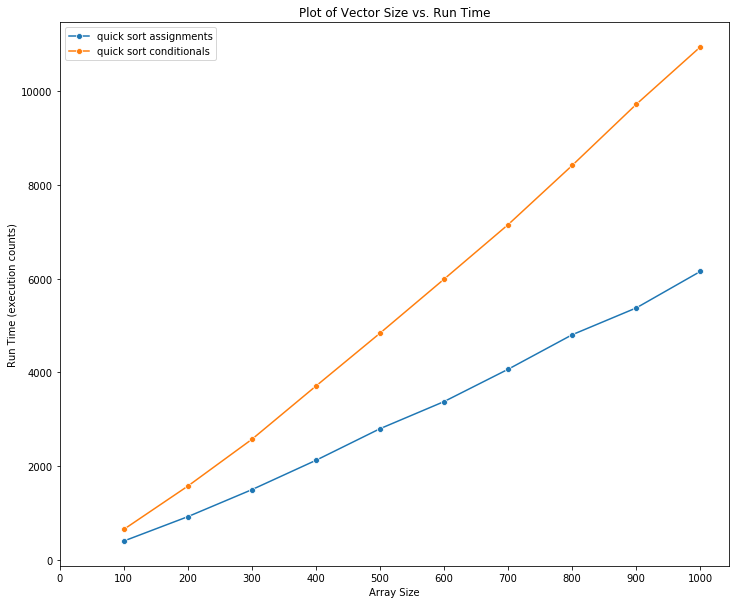

In [73]:
#plot of quicksort assignments and conditional with varying array length
f, ax = plt.subplots(figsize = [12, 10])
sns.lineplot(x=vector_size, y = quick_assignments, label="quick sort assignments", markers = True, marker ="o")
sns.lineplot(x=vector_size, y = quick_conditionals, label="quick sort conditionals", markers = True, marker ="o")
ax.set(xlabel = 'Array Size', ylabel = 'Run Time (execution counts)', title = 'Plot of Vector Size vs. Run Time',
      xticks = np.arange(0, 1100,100));

In [75]:
for index in range(len(vector_size)):
    print("For a",vector_size[index],"sized-vector, the average number of assignments is", quick_assignments[index], "and conditionals is", quick_conditionals[index], "for insertion sort")

For a 100 sized-vector, the average number of assignments is 400.46 and conditionals is 648.54 for insertion sort
For a 200 sized-vector, the average number of assignments is 920.86 and conditionals is 1572.88 for insertion sort
For a 300 sized-vector, the average number of assignments is 1497.84 and conditionals is 2571.62 for insertion sort
For a 400 sized-vector, the average number of assignments is 2124.24 and conditionals is 3708.95 for insertion sort
For a 500 sized-vector, the average number of assignments is 2799.15 and conditionals is 4837.79 for insertion sort
For a 600 sized-vector, the average number of assignments is 3378.05 and conditionals is 5991.6 for insertion sort
For a 700 sized-vector, the average number of assignments is 4068.51 and conditionals is 7155.74 for insertion sort
For a 800 sized-vector, the average number of assignments is 4805.29 and conditionals is 8419.41 for insertion sort
For a 900 sized-vector, the average number of assignments is 5377.75 and con

To verify that the big-O for quick sort is O(nlog(n)), I checked that the ratio (number of assignments/Nlog(N)) showed a relatively constant value. It did, with a value a bit below 0.9, proving quick sort does have a O(nlog(n)).

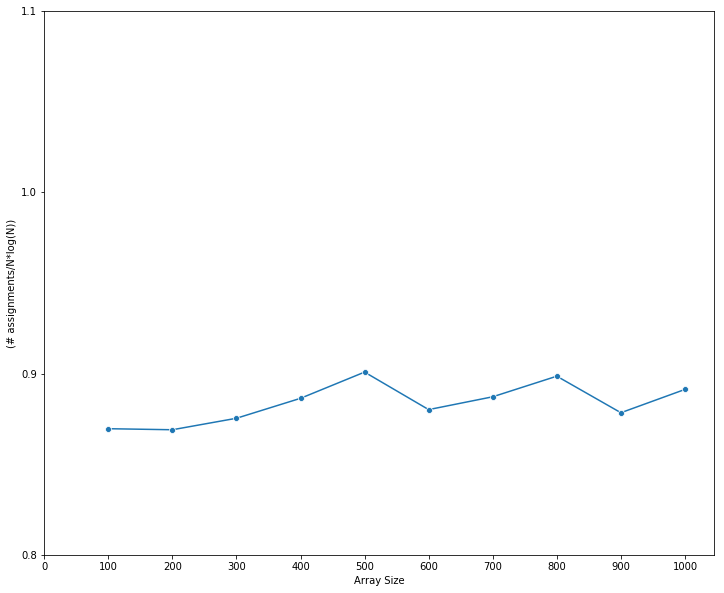

In [82]:
ratio = quick_assignments/(vector_size*np.log(vector_size))
f, ax = plt.subplots(figsize = [12, 10])
sns.lineplot(x=vector_size, y = ratio, markers = True, marker ="o")
ax.set(xlabel = 'Array Size', ylabel = '(# assignments/N*log(N))',
      xticks = np.arange(0, 1100,100),
      yticks = np.arange(0.8, 1.2, 0.1));